## Task 3: EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CFG_masters/survey_results_public.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [ ]:
df.tail()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Udemy,20,5,"Developer, front-end",100 to 499 employees,I have some influence,Investigate,NaN,Brazil,BRL\tBrazilian real,2.000000e+05,HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,MongoDB;MySQL;PostgreSQL;SQLite,PostgreSQL;SQLite,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Amazon Web Services (AWS);Heroku;Netlify;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Express;Node.js;Nuxt.js;Svelte;Vue.js,Flutter,NaN,Chocolatey;CMake;Docker;Maven (build tool);npm...,Docker;npm;Pip;Vite;Yarn,Android Studio;Atom;Eclipse;IntelliJ IDEA;Netb...,Visual Studio Code,Android;Windows,Android;Ubuntu;Windows,Asana;Confluence;Jira;Markdown File;Miro;Notio...,Markdown File;Miro;Wikis,Discord;Google Meet;Jitsi;Microsoft Teams;Slac...,Discord;Google Meet;Jitsi;Microsoft Teams;Tele...,ChatGPT,ChatGPT,Whispr AI,Whispr AI,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,Neutral,NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat trust,Learning about a codebase;Project planning;Wri...,Writing code;Documenting code;Debugging and ge...,Deployment and monitoring,NaN,NaN,NaN,NaN,Writing code;Documenting code;Debugging and ge...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,NaN,5,NaN,"Developer, back-end",NaN,NaN,Investigate,Start a free trial;Ask developers I know/work ...,Romania,NaN,NaN,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,PostgreSQL,PostgreSQL,NaN,NaN,Spring Boot,Spring Boot,Flutter;Opencv;RabbitMQ;Spring Framework;Torch...,RabbitMQ;Spring Framework;Torch/PyTorch,Maven (build tool);Pip,Maven (build tool);Pip,Android Studio;IntelliJ IDEA;PyCharm,IntelliJ IDEA;PyCharm,Windows,Windows,Jira,Jira,Microsoft Teams,Microsoft Teams,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, not really",I'm not sure

In [ ]:
df.sample()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
37315,37316,I agree,I am a developer by profession,45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,20,15,"Developer, full-stack","Just me - I am a freelancer, sole proprietor, ...",I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Spain,EUR European Euro,48000.0,Bash/Shell (all shells);Clojure;HTML/CSS;SQL,Bash/Shell (all shells);Clojure;HTML/CSS,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);OVH,Amazon Web Services (AWS);OVH,NaN,NaN,RabbitMQ,RabbitMQ,Docker;Maven (build tool);Pip,Docker;Maven (build tool);Pip,Emacs,Emacs,Debian,Debian;Ubuntu,Markdown File;Wikis,Linear;Markdown File;Wikis,Jitsi;Slack;Zulip,Jitsi;Slack;Zulip,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Less than once per month or monthly,Yes,I have never participated in Q&A on Stack Over...,"No, not really",NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,51403.0


In [ ]:
df.shape

(89184, 84)

**Observations**
*   There are a number of missing values in the text
*   There are a number of columns which are irrelevent to our analysis so can be removed



In [ ]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


**Observations**
- 'CompTotal' column is in different currencies so varies widely and is difficult to compare
- 'ConvertedCompYearly' is compensation converted into USD so will be used for comparison
- The range in converted salaries is vast (from `$1` to `$74,351,430`)
- However, 75% of respondents get paid `$121,641` or less so `$74,351,430` is an outlier
- The mean compensation is `$103,110` so `$1` is also an outlier
- The mean (`$103,110) and median (`$74,963`) average pay vary significantly, meaning that the mean is being influenced by very high outliers and the median may be a better measure of average pay in this case
- The work experience shows a good range from 0 to 50 years, meaning there will be a good representation of experience
- However, 75% of respondants actually have fewer than 16 years' experience so 50 years is an outlier (the mean being 11.4 years and median being 9 years).


In [ ]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [ ]:
df.dtypes

ResponseId                               int64
Q120                                    object
MainBranch                              object
Age                                     object
Employment                              object
RemoteWork                              object
CodingActivities                        object
EdLevel                                 object
LearnCode                               object
LearnCodeOnline                         object
LearnCodeCoursesCert                    object
YearsCode                               object
YearsCodePro                            object
DevType                                 object
OrgSize                                 object
PurchaseInfluence                       object
TechList                                object
BuyNewTool                              object
Country                                 object
Currency                                object
CompTotal                              float64
LanguageHaveW

In [ ]:
pd.set_option('display.max_rows', None)
missing = df.isna().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing

AINextVery similar                     86563
AINextSomewhat similar                 82946
AINextNeither different nor similar    82585
AINextVery different                   76523
AIDevWantToWorkWith                    69597
AIToolNot interested in Using          68115
AINextSomewhat different               65881
AIDevHaveWorkedWith                    63280
AIToolInterested in Using              56401
AIToolCurrently Using                  53047
Industry                               52410
LearnCodeCoursesCert                   52108
AIAcc                                  50590
Frequency_3                            48130
Knowledge_8                            47780
Knowledge_7                            47717
Knowledge_6                            47664
Knowledge_5                            47657
Knowledge_2                            47514
Knowledge_4                            47500
ProfessionalTech                       47401
Knowledge_3                            47386
Frequency_

**Observations**
- Most columns have missing values
- In some columns, almost all values are missing so they are not useable, but many also do not relate to our question
- Almost half of the survey respondents didn't share their salary. Some of these may not be working developers. For the others we will need to consider how we fill these values. The same goes for work experience.

## Initial Visualisations

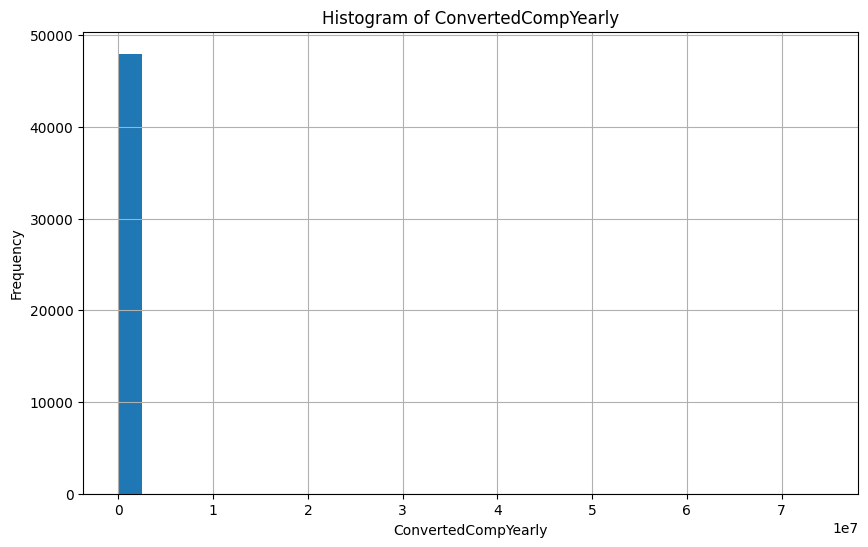

In [ ]:
# Histogram for the ConvertedCompYearly column (non-zero values)
plt.figure(figsize=(10, 6))
df['ConvertedCompYearly'].hist(bins=30)
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedCompYearly')
plt.show()


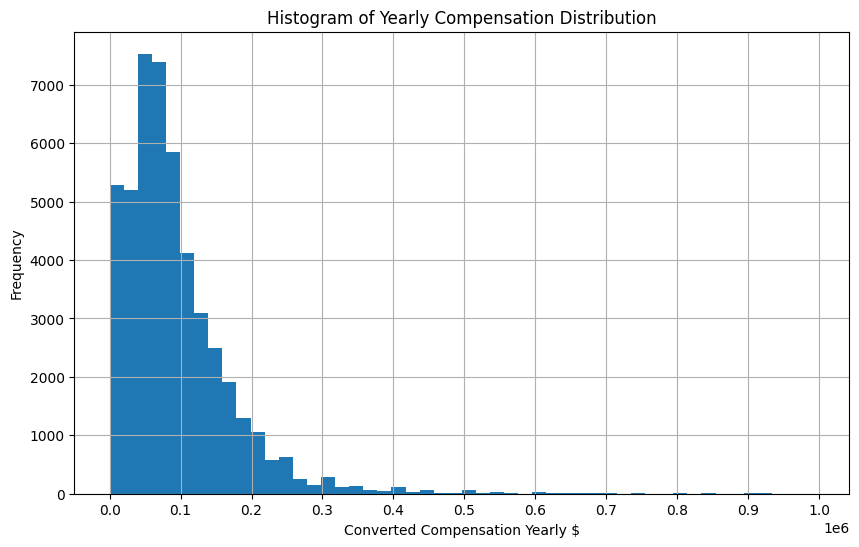

In [ ]:
df_filtered = df[df['ConvertedCompYearly'] < 1000000]
plt.figure(figsize=(10, 6))
df_filtered['ConvertedCompYearly'].hist(bins=50)
plt.xlabel('Converted Compensation Yearly $')
plt.ylabel('Frequency')
plt.title('Histogram of Yearly Compensation Distribution')
plt.gca().xaxis.set_major_locator(MultipleLocator(100000))
plt.savefig('compensation_under_1m.png')
plt.show()

**Notes:**
- Very high outliers make the first histogram unreadable so we excluded anything over `£1m` to get a better overview of the distribution.
- The second histogram shows that the salary data is right skewed, with most people earning between `$0` and `$100,000`
- Although there are salaries over `$500,000`, these are outliers
- On closer inspection (below) only 303 people (around 0.7% of respondents who shared their salaries) earn over `$500,000`

In [ ]:
high_earners = df[df['ConvertedCompYearly']>=500000]
high_earners.shape

(303, 84)

##Task 4: Data Cleaning

Steps:
- remove unwanted columns
- handle missing values
- handle outliers
- handle duplicates

In [ ]:
df = df[['ResponseId','MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'Country', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith','MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith',
       'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith',
       'NEWSOSites', 'SOVisitFreq', 'SOPartFreq',
       'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen','AIToolCurrently Using',
       'ICorPM','WorkExp','Industry','ConvertedCompYearly']]

In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,CompTotal,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,AISearchHaveWorkedWith,AIDevHaveWorkedWith,NEWSOSites,SOVisitFreq,SOPartFreq,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolCurrently Using,ICorPM,WorkExp,Industry,ConvertedCompYearly
0,1,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Electron;React Native;Tauri,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,ChatGPT,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,A few times per month or weekly,"I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Writing code;Committing and reviewing code,People manager,10.0,"Information Services, IT, Software Development...",285000.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,United States of America,USD\tUnited States dollar,250000.0,Bash/Shell (all shells);Go,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Emacs;Helix,NaN,NaN,Stack Overflow;Stack Exchange;Stack Overflow f...,A few times per month or weekly,Less than once per month or monthly,NaN,"No, and I don't plan to",NaN,NaN,NaN,NaN,Individual contributor,23.0,"Information Services, IT, Software Development...",250000.0
3,4,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,NaN,12,7,"Developer, front-end",100 to 499 employees,I have some influence,Investigate,United States of America,USD\tUnited States dollar,156000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,NaN,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,NaN,NaN,Stack Overflow;Stack Exchange,A few times per week,Less than once per month or monthly,I'm wearing of Stack Overflow using AI.,"No, and I don't plan to",NaN,NaN,NaN,NaN,Individual contributor,7.0,NaN,156000.0
4,5,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Other;Codecademy;edX,6,4,"Developer, full-stack",20 to 99 employees,I have some influence,Investigate,Philippines,PHP\tPhilippine peso,1320000.0,HTML/CSS;JavaScript;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Net

In [ ]:
missing = df.isna().sum()
missing

ResponseId                          0
MainBranch                          0
Age                                 0
Employment                       1286
RemoteWork                      15374
CodingActivities                15420
EdLevel                          1211
LearnCode                        1521
LearnCodeOnline                 19100
LearnCodeCoursesCert            52108
YearsCode                        1749
YearsCodePro                    23048
DevType                         12312
OrgSize                         24141
PurchaseInfluence               24220
TechList                        28333
Country                          1211
Currency                        23850
CompTotal                       40959
LanguageHaveWorkedWith           2044
DatabaseHaveWorkedWith          15749
PlatformHaveWorkedWith          25556
WebframeHaveWorkedWith          22246
MiscTechHaveWorkedWith          32165
ToolsTechHaveWorkedWith         11300
NEWCollabToolsHaveWorkedWith     3320
AISearchHave

In [ ]:
df['Employment'].values

array([nan, 'Employed, full-time', 'Employed, full-time', ...,
       'I prefer not to say', 'Employed, part-time;Student, part-time',
       'Employed, full-time'], dtype=object)

In [ ]:
df = df.dropna(subset=['Employment'])
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                                     53748
Student, full-time                                                                                                                                                                                                       7430
Independent contractor, freelancer, or self-employed                                                                                                                                                                     7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 4354
Not employed, but looking for work                                                                   

In [ ]:
# Create dataframe containing only the employed respondents
employed = df[df['Employment'].str.contains('Employed, full-time') | df['Employment'].str.contains('Employed, part-time') | df['Employment'].str.contains('Independent contractor')  ]
employed.shape

(73836, 39)

In [ ]:
# Select only people employed as developers
employed = employed[employed['MainBranch']=="I am a developer by profession"]
employed.shape

(63644, 39)

In [ ]:
# Check missing values in employed df
employed.isna().sum()


ResponseId                          0
MainBranch                          0
Age                                 0
Employment                          0
RemoteWork                         11
CodingActivities                   58
EdLevel                             0
LearnCode                         222
LearnCodeOnline                 13224
LearnCodeCoursesCert            36291
YearsCode                         275
YearsCodePro                     4837
DevType                           192
OrgSize                          4559
PurchaseInfluence                4629
TechList                        21756
Country                             0
LanguageHaveWorkedWith            273
DatabaseHaveWorkedWith           7912
PlatformHaveWorkedWith          14358
WebframeHaveWorkedWith          12576
MiscTechHaveWorkedWith          21218
ToolsTechHaveWorkedWith          5365
NEWCollabToolsHaveWorkedWith      970
AISearchHaveWorkedWith          24391
AIDevHaveWorkedWith             44908
NEWSOSites  

In [ ]:
# Remove any columns where more than half of the data is missing and which are not essential for our enquiry
threshold = 0.5
missing_proportion = employed.isna().mean()
employed = employed.loc[:, missing_proportion <= threshold]
employed.isna().sum()

ResponseId                          0
MainBranch                          0
Age                                 0
Employment                          0
RemoteWork                         11
CodingActivities                   58
EdLevel                             0
LearnCode                         222
LearnCodeOnline                 13224
YearsCode                         275
YearsCodePro                     4837
DevType                           192
OrgSize                          4559
PurchaseInfluence                4629
TechList                        21756
Country                             0
LanguageHaveWorkedWith            273
DatabaseHaveWorkedWith           7912
PlatformHaveWorkedWith          14358
WebframeHaveWorkedWith          12576
MiscTechHaveWorkedWith          21218
ToolsTechHaveWorkedWith          5365
NEWCollabToolsHaveWorkedWith      970
AISearchHaveWorkedWith          24391
NEWSOSites                          0
SOVisitFreq                       315
SOPartFreq  

In [ ]:
employed[['Age','EdLevel','YearsCode','YearsCodePro','WorkExp','ConvertedCompYearly']].head(100)

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly
1,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,10.0,285000.0
2,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,23.0,250000.0
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,7.0,156000.0
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,6.0,23456.0
5,35-44 years old,Some college/university study without earning ...,21,21,22.0,96828.0
6,35-44 years old,Some college/university study without earning ...,4,3,4.0,135000.0
7,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,5.0,80000.0
10,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",14,3,3.0,NaN
11,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,NaN,78003.0
12,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,9,9.0,75000.0


In [ ]:
employed[['Age','EdLevel','YearsCode','YearsCodePro','WorkExp','ConvertedCompYearly']].dtypes

Age                     object
EdLevel                 object
YearsCode               object
YearsCodePro            object
WorkExp                float64
ConvertedCompYearly    float64
dtype: object

In [ ]:
def convert_to_numeric(years):
    if years == 'Less than 1 year':
        return 0.5
    elif years == 'More than 50 years':
        return 50
    else:
        return float(years)

employed['YearsCode'] = employed['YearsCode'].apply(convert_to_numeric)
employed['YearsCodePro'] = employed['YearsCodePro'].apply(convert_to_numeric)

In [ ]:
# Calculate the mean difference between YearsCode and YearsCodePro to be used to fill missing values
difference_years = employed['YearsCode'] - employed['YearsCodePro']
av_difference_years = difference_years.mean()
print(av_difference_years)

4.767881149703045


**Handling missing data:**
- There is still a vast amount of data missing in the employed dataframe
- Missing data in each column will need to be handled differently as they are different datatypes/have different purposes

**Most relevant columns to our study:**
- YearsCode: Will be filled with the median                         
- YearsCodePro: Will be filled with `YearsCode - av_difference_years` (see above)
- WorkExp: Missing data will be filled with the 'YearsCodePro' data as, on examination, the answers for these questions are predominantly similar (with the exception of career changers)
- ConvertedCompYearly: Missing data in these columns will be filled with the median, but machine learning will be used to get better estimates later

**Other columns:**
<br>
Other columns where data is categorical (e.g. organisation size, industry etc), missing vals will be filled with the mode

In [ ]:
# Fill YearsCode NaN values
employed['YearsCode']=employed['YearsCode'].fillna(employed['YearsCode'].median())



In [ ]:
# Fill YearsCodePro NaN values
employed['YearsCodePro']=employed['YearsCodePro'].fillna(employed['YearsCode']-av_difference_years)


In [ ]:
# Fill WorkExp NaN values
employed['WorkExp'] = employed['WorkExp'].fillna(employed['YearsCodePro'])


In [ ]:
# Fill ConvertedCompYearly NaN values

employed['ConvertedCompYearly'] = employed['ConvertedCompYearly'].fillna(employed['ConvertedCompYearly'].median())


In [ ]:
employed.isna().sum().sort_values()

ResponseId                          0
WorkExp                             0
AISelect                            0
NEWSOSites                          0
Country                             0
YearsCodePro                        0
YearsCode                           0
ConvertedCompYearly                 0
EdLevel                             0
MainBranch                          0
Age                                 0
Employment                          0
RemoteWork                         11
CodingActivities                   58
DevType                           192
LearnCode                         222
LanguageHaveWorkedWith            273
SOVisitFreq                       315
NEWCollabToolsHaveWorkedWith      970
OrgSize                          4559
PurchaseInfluence                4629
ToolsTechHaveWorkedWith          5365
DatabaseHaveWorkedWith           7912
WebframeHaveWorkedWith          12576
LearnCodeOnline                 13224
SOPartFreq                      14313
PlatformHave

In [ ]:
employed.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence',
       'TechList', 'Country', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith',
       'AISearchHaveWorkedWith', 'NEWSOSites', 'SOVisitFreq', 'SOPartFreq',
       'SOAI', 'AISelect', 'AISent', 'AIBen', 'ICorPM', 'WorkExp', 'Industry',
       'ConvertedCompYearly'],
      dtype='object')

In [ ]:
# Fill NaN values in categorical data columns with mode
def fill_missing_vals(df, column):
  mode_val = df[column].mode()[0]
  df[column].fillna(mode_val, inplace=True)


categorical_columns = ['LearnCode', 'LearnCodeOnline','DevType','OrgSize','RemoteWork',
                       'PurchaseInfluence','TechList','LanguageHaveWorkedWith',
                       'DatabaseHaveWorkedWith','PlatformHaveWorkedWith',
                       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
                       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith',
                       'AISearchHaveWorkedWith', 'NEWSOSites', 'SOVisitFreq', 'SOPartFreq',
                       'SOAI', 'AISent', 'AIBen', 'ICorPM','Industry', 'CodingActivities'
                       ]

for column in categorical_columns:
  fill_missing_vals(employed, column)

In [ ]:
employed.isna().sum()

ResponseId                      0
MainBranch                      0
Age                             0
Employment                      0
RemoteWork                      0
CodingActivities                0
EdLevel                         0
LearnCode                       0
LearnCodeOnline                 0
YearsCode                       0
YearsCodePro                    0
DevType                         0
OrgSize                         0
PurchaseInfluence               0
TechList                        0
Country                         0
LanguageHaveWorkedWith          0
DatabaseHaveWorkedWith          0
PlatformHaveWorkedWith          0
WebframeHaveWorkedWith          0
MiscTechHaveWorkedWith          0
ToolsTechHaveWorkedWith         0
NEWCollabToolsHaveWorkedWith    0
AISearchHaveWorkedWith          0
NEWSOSites                      0
SOVisitFreq                     0
SOPartFreq                      0
SOAI                            0
AISelect                        0
AISent        

In [ ]:
# Check if there are any duplicates in the data
employed.duplicated().sum()

0

In [ ]:
path = 'survey_data_clean.csv'
employed.to_csv(path, index=False)